##### In this section, we're going to visualise the data and do some more Exploratory data analysis (EDA).

### Import Necessary libaries

In [27]:
import pandas as pd
pd.options.display.max_rows = 1000 #for showing truncated results
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [3]:
# importing data
dates = pd.read_csv('Dataset/Speed Dating Data.csv', encoding="ISO-8859-1") # we are using this encoding due to the format of the dataset. 
dates.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


###### Narrowing the dataset:

In [4]:
dates_1 = dates.iloc[:, 11:28]
dates_2 = dates.iloc[:, 30:35]
dates_3 = dates.iloc[:, 39:43]
dates_4 = dates.iloc[:, 45:67]
dates_5 = dates.iloc[:, 69:74]
dates_6 = dates.iloc[:, 87:91]
dates_7 = dates.iloc[:, 97:102]
dates_8 = dates.iloc[:, 104:107]

date = pd.concat([dates.iloc[:, 0],dates.iloc[:, 2],dates_1,dates_2,dates_3,dates_4,dates_5,
                      dates_6,dates_7,dates_8], axis=1)

In [5]:
# deleting null rows that the nulls are in the hundreds and not in the thousands
date2 = date.dropna()

In [6]:
# check datatypes
date2.dtypes

iid           int64
gender        int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field        object
race        float64
imprace     float64
imprelig    float64
from         object
goal        float64
date        float64
go_out      float64
career       object
career_c    float64
sports      float64
tvsports    float64
exercise    float64
dining      float64
museums     float64
art         float64
hiking      float64
gaming      float64
clubbing    float64
reading     float64
tv          float64
theater     float64
movies      float64
concerts    float64
music       float64
shopping    float64
yoga        float64


In [7]:
# creating an object-free dataframe
date3 = date2.drop(['field', 'from', 'career'], axis=1)

# Visualisation:

## 1. Heatmap

<AxesSubplot:title={'center':'Correlation Heatmap'}>

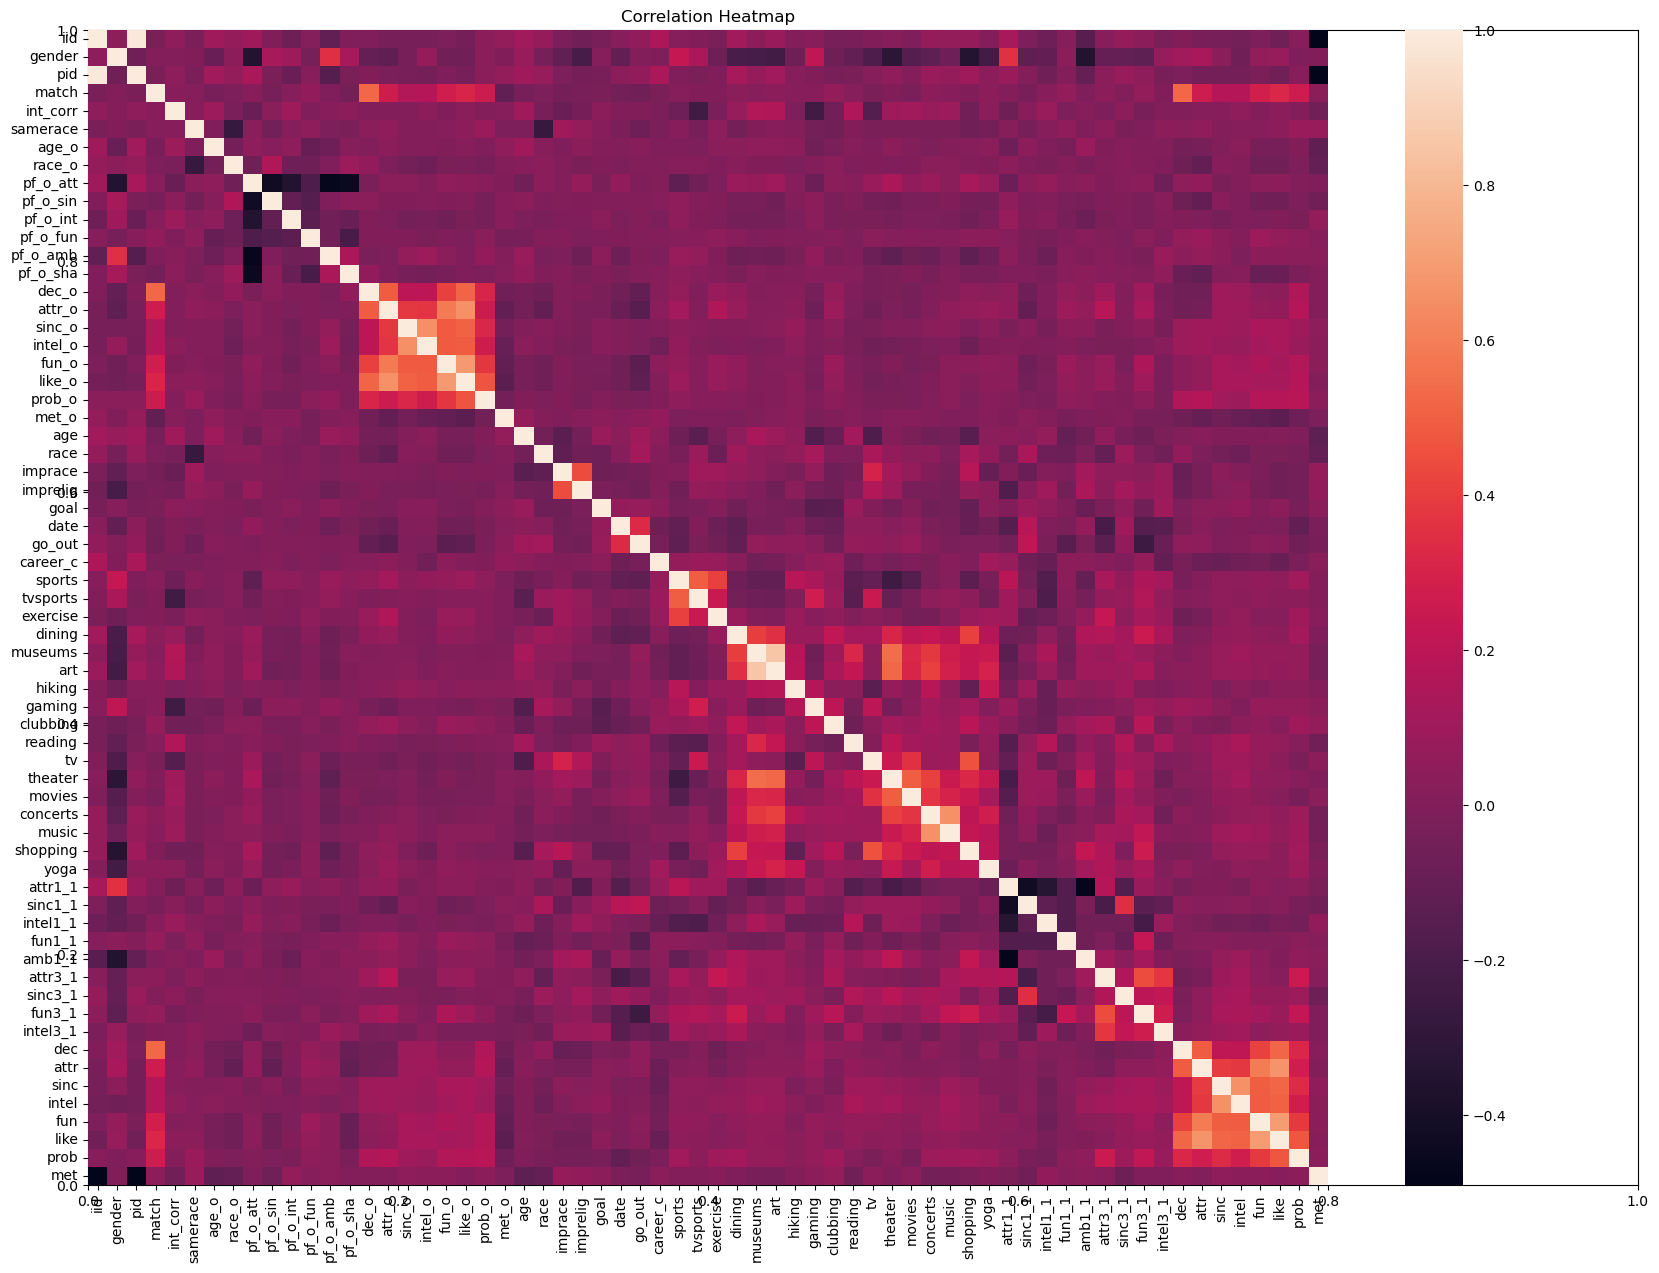

In [9]:
# heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = date3.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Intriguing observations can be drawn from the heatmap above.

Men (gender = 1), for instance, appear to prefer attractive partners (attr1_1), whilst women (gender = 0) appear to prefer ambitious partners (amb1_1)!

Another example, men like gaming while women enjoy shopping and yoga. These facts seems about right. So at least we know the dataset has some truth to it. 

## 2. PairPlot (Overlapping interests)

Now, Let's take a closer look at the **participants' interests**, In particular overlaping interest.

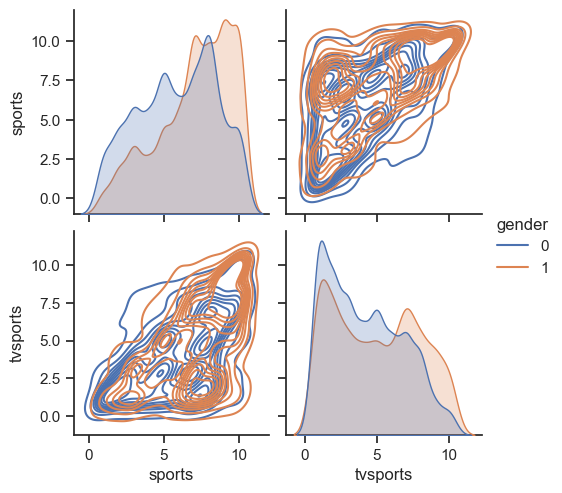

In [18]:
#Sports and tvsoprts overlap
sns.set(style="ticks", color_codes=True)
date_int = pd.concat([date3.iloc[:, 1],date3.iloc[:, 30:32]],axis = 1)
g = sns.pairplot(date_int, hue="gender", kind="kde")

This code above generates a pairplot that illustrates the overlap of interests from both genders using the Python libraries pandas and seaborn.

The style and color scheme for the plots that will be generated by seaborn are first determined by the sns.set function. In this case, it sets the style to "ticks" and turns on color codes.

Next, specified columns from the date3 dataframe are concatenated to form the date_int variable. Specifically, it chooses the first column (date3.iloc[:, 1]) as well as columns 30 and 31 (date3.iloc[:, 30:32]). This generates a brand-new dataframe with the participants' interests listed in these three columns.


Finally, the sns.pairplot function is used to create a grid of plots that shows the pairwise relationships between the interests. The hue parameter is set to "gender", which means that the plot will be colored based on the gender of the users. This allows for easy comparison of interest overlap between genders.

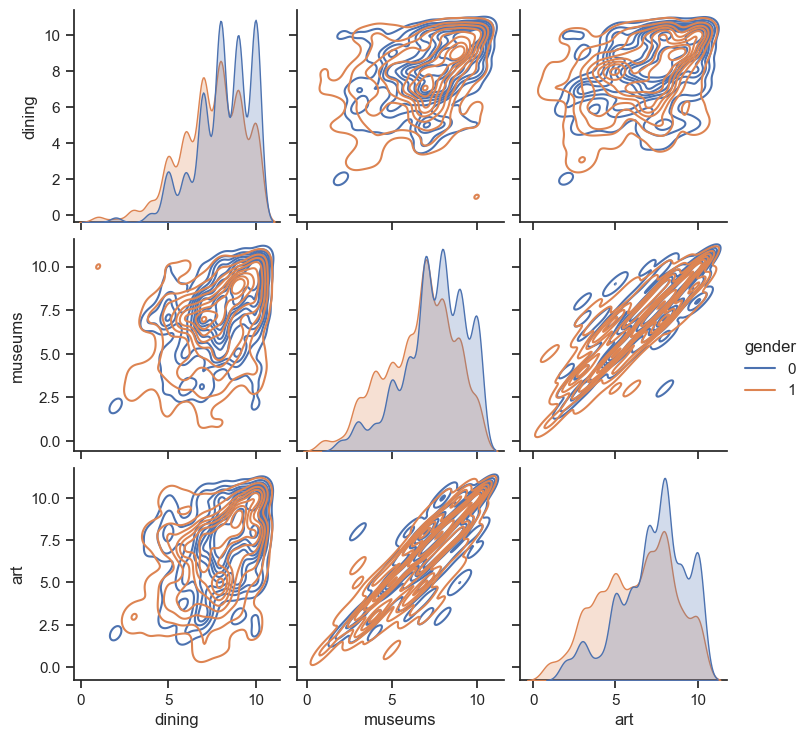

In [19]:
#Art, Museums and Dining overlap
sns.set(style="ticks", color_codes=True)
date_int = pd.concat([date3.iloc[:, 1],date3.iloc[:, 33:36]],axis = 1)
g = sns.pairplot(date_int, hue="gender", kind="kde")

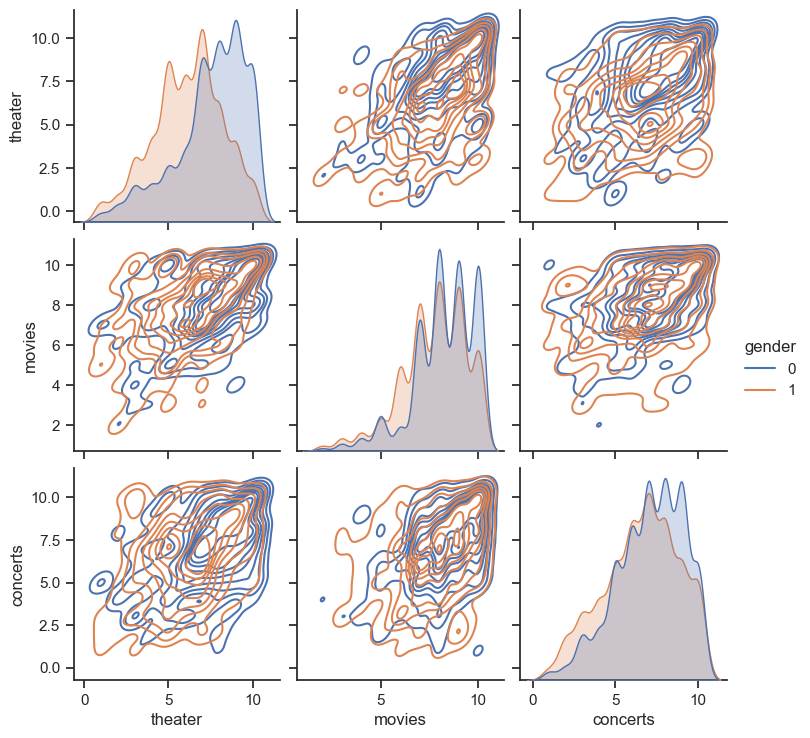

In [20]:
#Concerts, Movies and Theater overlap
sns.set(style="ticks", color_codes=True)
date_int2 = pd.concat([date3.iloc[:, 1],date3.iloc[:, 41:44]],axis = 1)
g = sns.pairplot(date_int2, hue="gender", kind="kde")

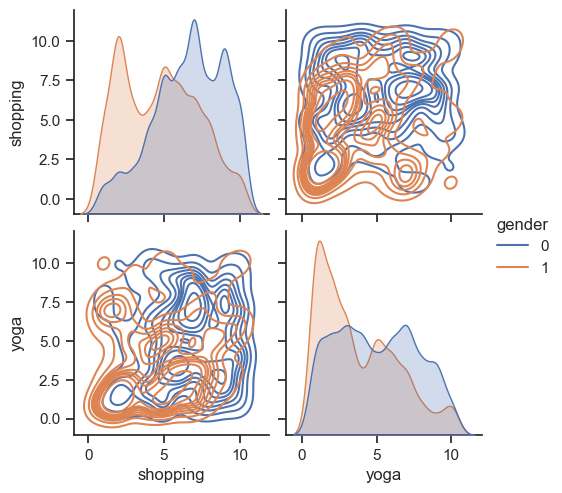

In [22]:
#Yoga and Shopping overlap
sns.set(style="ticks", color_codes=True)
date_int3 = pd.concat([date3.iloc[:, 1],date3.iloc[:, 45:47]],axis = 1)
g = sns.pairplot(date_int3, hue="gender", kind="kde")

The histograms above show that if you want to suggest a date that both genders are likely to enjoy, choose going on a date which is of a common interest, such as watching a movie or dining.

However, referring back to the heatmap none of the interests really correlated with match result. Hence, we can remove interests from the match prediction model!

Additionally, it appears that match (the variable we are interested in) is mostly correlated to the decisions of the partners, and the partner's attributes (how well they rated the partner's attractiveness, sincerity, intelligence, fun, ambition, and how much they liked them).

Interestingly, match was not correlated to age or race, or even how similar the participant and partner's interests are (int_corr). The data indicate that love is impartial. This really show the reason behind the saying "Love is blind."


In [23]:
# removing interests
date4 = date3.drop(['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
                    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 
                   'shopping', 'yoga'], axis=1)

## 3. Bar Graph (Results by gender difference)

To further investigate gender differences, our group ponder on does one's gender affect another person decision on wether one will get a second date or not? That is, **do women receive more positive final decisions than men do just because they are women**?

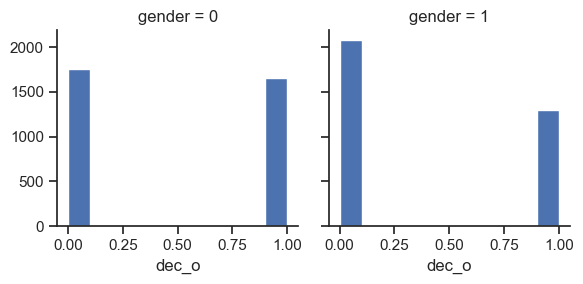

In [25]:
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(date4, col="gender")
g = g.map(plt.hist, "dec_o")
plt.ticklabel_format(useOffset=False, style='plain')

In [28]:
# chi-square test
gender_crosstab = pd.crosstab(index=date4.gender, columns=date4.dec_o)
gender_table = sm.stats.Table(gender_crosstab)
gender_rslt = gender_table.test_nominal_association()
gender_rslt.pvalue

1.1102230246251565e-16

From the bar graphs above, it looks like women received about 1750 'no' and about 1600 'yes' for the decision question "Would you like to see him or her again?". Whereas, men received about 2050 'no' and about 1300 'yes'. In other words, **men are more likely to be rejected by women than women are to be rejected by men.** This is a statistically significant difference as **confirmed by the above chi-squared test p-value**.

## 4. Box and Whiskers (One-sided Love)

Furthermore, we can also find out the **how many participants left the venue heartbroken**. Meaning that their love were unrequited (one-sided). To do this, we need to count the number of rows where dec = 1 AND dec_o = 0 OR dec_o = 1 AND dec = 0

In [30]:
# one-sided love count
no_love_count = len(date4[(date4['dec_o']==0) & (date4['dec']==1)]) 
+ len(date4[(date4['dec_o']==1) & (date4['dec']==0)])
perc_broken_heart = no_love_count / len(date4.index)
perc_broken_heart*100

26.040900397234072

from the count above, it seems that **26% of participants unfortunately had their heart broken**. More than the percentage of people who got a second date, which is 20%.

In addition, our group ponder if the incidence of one-sided love differs by the attractiveness of the partner. This can be visualised using a box and whiskers plot.

In [31]:
# encoding one-sided love as a new column
date4['url']=np.where(((date4['dec_o']==0) & (date4['dec']==1))|((date4['dec']==0) & (date4['dec_o']==1)),1,0)

Text(0.5, 0, 'Broken Heart')

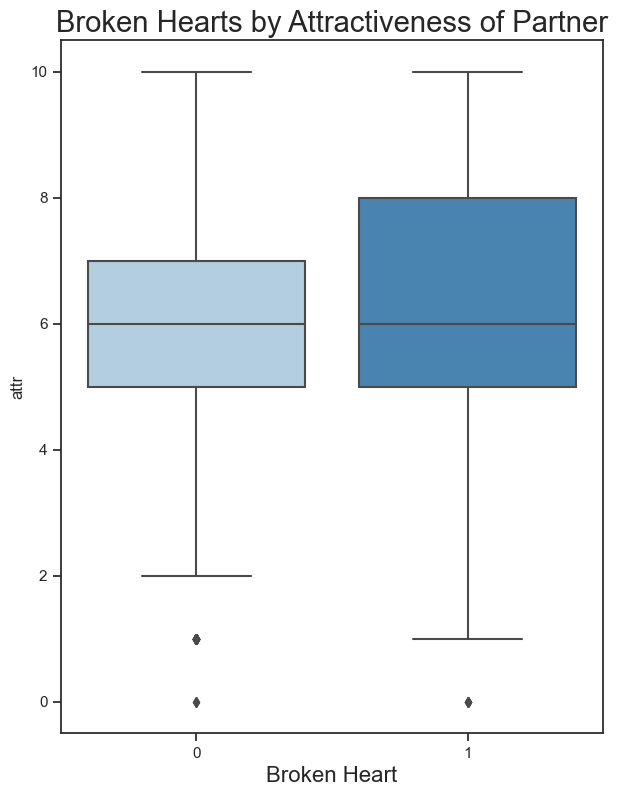

In [36]:
# looking at url by attractiveness
plt.figure(figsize=(7,9))
sns.boxplot(x='url', y='attr', data=date4, palette="Blues")
plt.title('Broken Hearts by Attractiveness of Partner', fontsize=21)
plt.xlabel('Broken Heart', fontsize=16)

In [37]:
# chi-square test
bh_crosstab = pd.crosstab(index=date4.attr, columns=date4.url)
bh_table = sm.stats.Table(bh_crosstab)
bh_rslt = bh_table.test_nominal_association()
bh_rslt.pvalue

0.5300021303134914

Looks like the difference in attractiveness of both parties was not statistically significant. From this plot, we can conclude that **the likelihood of getting rejected is not dependent on one's attractiveness**.

Next part, we will start on the machine learning models